In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, shapiro,kstest
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score 


In [2]:
df= pd.read_excel("data.update vehicle.xlsx")
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [4]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [5]:
df['horsepower']=df.horsepower.astype('int')
df['origin']=df.origin.astype('category')
df['cylinders']=df.cylinders.astype('category')

In [6]:
df.drop(columns=['name','year'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   origin               398 non-null    category
 1   cylinders            398 non-null    category
 2   displacement         398 non-null    float64 
 3   horsepower           398 non-null    int32   
 4   weight               398 non-null    int64   
 5   acceleration         398 non-null    float64 
 6   Kilometer_per_liter  398 non-null    float64 
dtypes: category(2), float64(3), int32(1), int64(1)
memory usage: 15.2 KB


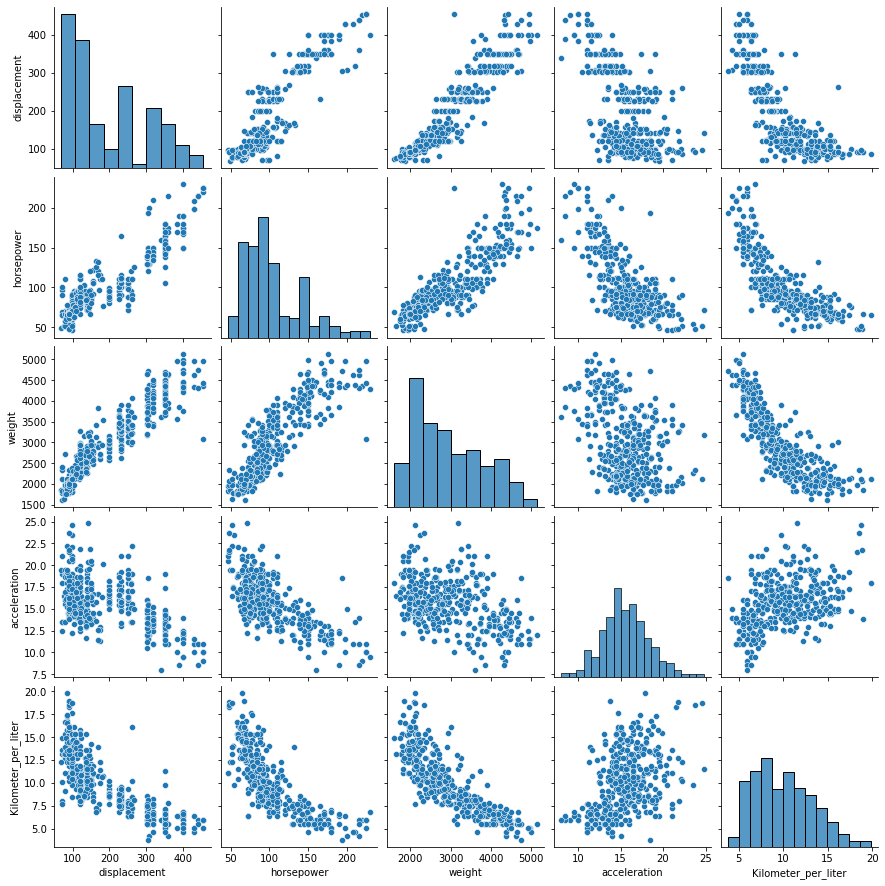

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df.describe()

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,104.138191,2970.424623,15.568090,9.997073
std,104.269838,38.304014,846.841774,2.757689,3.322917
min,68.000000,46.000000,1613.000000,8.000000,3.826293
25%,104.250000,76.000000,2223.750000,13.825000,7.440015
50%,148.500000,92.000000,2803.500000,15.500000,9.778305
75%,262.000000,125.000000,3608.000000,17.175000,12.329168
max,455.000000,230.000000,5140.000000,24.800000,19.811697


### Outlier Check - Dependent Variable

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer_per_liter'>

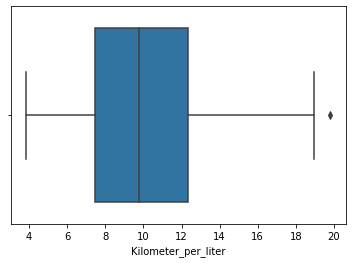

In [10]:
sns.boxplot(df.Kilometer_per_liter)

### Outlier Treatment

In [11]:
df.drop(df.index[df.Kilometer_per_liter>19],axis=0, inplace=True)

(397, 7)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer_per_liter'>

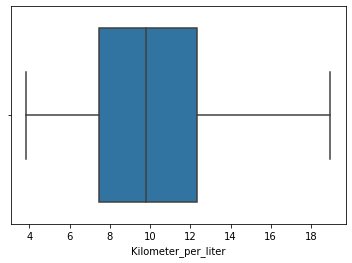

In [12]:
print(df.shape)
sns.boxplot(df.Kilometer_per_liter)

### Numerical Attributes

In [13]:
num= df.iloc[:,2:]
num

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,307.0,130,3504,12.0,7.652587
1,350.0,165,3693,11.5,6.377156
2,318.0,150,3436,11.0,7.652587
3,304.0,150,3433,12.0,6.802299
4,302.0,140,3449,10.5,7.227443
...,...,...,...,...,...
393,140.0,86,2790,15.6,11.478880
394,97.0,52,2130,24.6,18.706323
395,135.0,84,2295,11.6,13.604599
396,120.0,79,2625,18.6,11.904024


### Independent Attributes

### Categorical Attributes

In [14]:
cat= df.iloc[:,0:2]
cat

,origin,cylinders
0,1,8
1,1,8
2,1,8
3,1,8
4,1,8
...,...,...
393,1,4
394,2,4
395,1,4
396,1,4


### Independent- Numerical Attributes

In [15]:
IDVn= num.iloc[:,0:-1]
IDVn

,displacement,horsepower,weight,acceleration
0,307.0,130,3504,12.0
1,350.0,165,3693,11.5
2,318.0,150,3436,11.0
3,304.0,150,3433,12.0
4,302.0,140,3449,10.5
...,...,...,...,...
393,140.0,86,2790,15.6
394,97.0,52,2130,24.6
395,135.0,84,2295,11.6
396,120.0,79,2625,18.6


### Dependent Attribute

In [16]:
DV= num.iloc[:,-1]
DV

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 397, dtype: float64

## Univariate Analysis

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylinders', ylabel='count'>

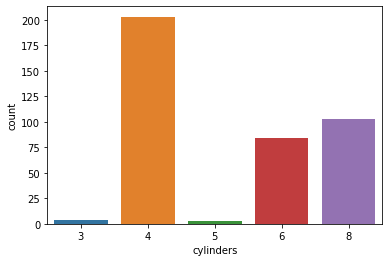

In [17]:
sns.countplot(df.cylinders)

<AxesSubplot:ylabel='origin'>

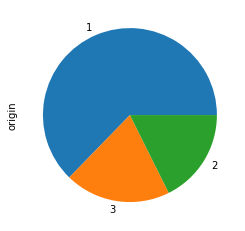

In [18]:
df.origin.value_counts().plot.pie()

## To know number of cylinders for vehicles that each origin deals in.

In [19]:
df.groupby(['origin','cylinders']).count()

displacement  horsepower  weight  acceleration  \
origin cylinders                                                   
1      3                     0           0       0             0   
       4                    72          72      72            72   
       5                     0           0       0             0   
       6                    74          74      74            74   
       8                   103         103     103           103   
2      3                     0           0       0             0   
       4                    63          63      63            63   
       5                     3           3       3             3   
       6                     4           4       4             4   
       8                     0           0       0             0   
3      3                     4           4       4             4   
       4                    68          68      68            68   
       5                     0           0       0             0   
       6                     6           6       6             6   
       8                     0           0       0             0   

                  Kilometer_per_liter  
origin cylinders                       
1      3                            0  
       4                           72  
       5                            0  
       6                           74  
       8                          103  
2      3                            0  
       4                           63  
       5                            3  
       6                            4  
       8                            0  
3      3                            4  
       4                           68  
       5                            0  
       6                            6  
       8                            0

#### 
Origin 1 deals with vehicles having 4 cylinders, 6 cylinders and 8 cylinders.

Origin 2 deals with vehicles having 4 cylinders,5 cylinders and 6 cylinders.

Origin 3 deals with vehicles having 3 cylinders, 4 cylinders and 6 cylinders

### Normality Check

Normality Check of displacement


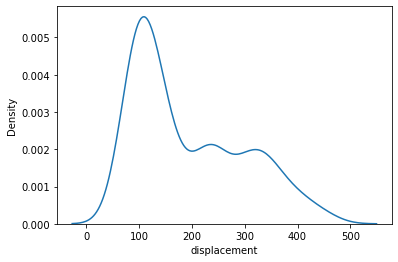

Pvalue of shapiro test = 5.964620064363081e-17
Not Significant: Not Normally Distributed


Pvalue of kstest = 0.0
Not Significant: Not Normally Distributed
-------------------------------------------------------------------------------------------------
Normality Check of horsepower


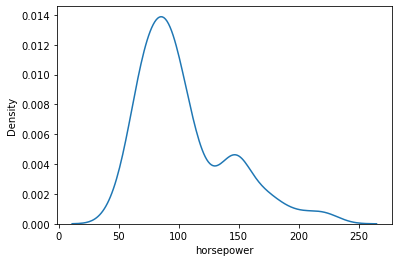

Pvalue of shapiro test = 2.472507172485432e-15
Not Significant: Not Normally Distributed


Pvalue of kstest = 0.0
Not Significant: Not Normally Distributed
-------------------------------------------------------------------------------------------------
Normality Check of weight


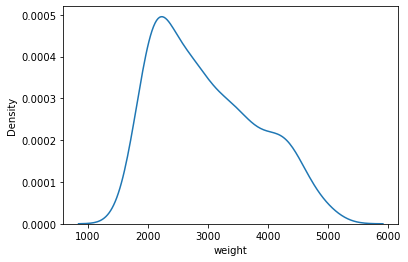

Pvalue of shapiro test = 2.4053706942916975e-11
Not Significant: Not Normally Distributed


Pvalue of kstest = 0.0
Not Significant: Not Normally Distributed
-------------------------------------------------------------------------------------------------
Normality Check of acceleration


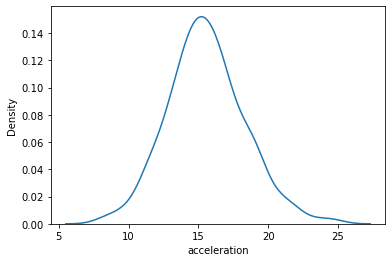

Pvalue of shapiro test = 0.03448907285928726
Not Significant: Not Normally Distributed


Pvalue of kstest = 0.0
Not Significant: Not Normally Distributed
-------------------------------------------------------------------------------------------------
Normality Check of Kilometer_per_liter


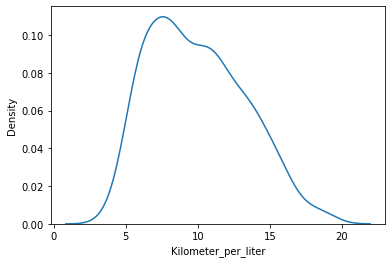

Pvalue of shapiro test = 1.2901043078272778e-07
Not Significant: Not Normally Distributed


Pvalue of kstest = 0.0
Not Significant: Not Normally Distributed
-------------------------------------------------------------------------------------------------


In [20]:
s=0
p=0
s1=0
p1=0
for i in num:
    print('Normality Check of',i)
    sns.kdeplot(num[i])
    plt.show()
    s,p=shapiro(num[i])
    print('Pvalue of shapiro test =',p)
    if p>0.05:
        print(' Significant: Normally Distributed')
    else:
        print('Not Significant: Not Normally Distributed')
    print('\n')
    s1,p1=kstest(num[i],'norm')
    print('Pvalue of kstest =',p1)
    if p>0.05:
        print(' Significant: Normally Distributed')
    else:
        print('Not Significant: Not Normally Distributed')
    print('-------------------------------------------------------------------------------------------------')
    

#### The dependent variable - Kilometer_per_liter is not normally distributed

### Bivariate Analysis

#### Linearity Check - Dependent Variable

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


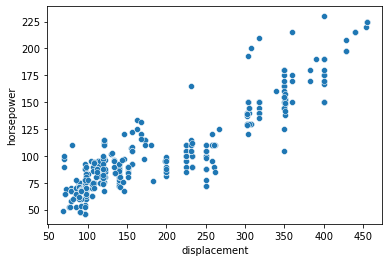

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between displacement and horsepower
Correlation = 0.8972262768393463 Pvalue = 2.663429670603193e-142
 Significant: Correlated
-------------------------------------------------------------------------------------------------


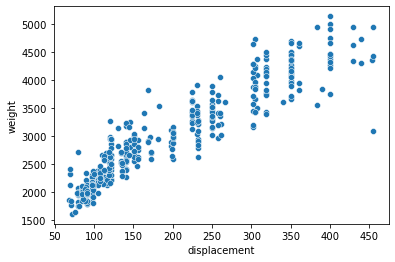

Correlation check between displacement and weight
Correlation = 0.9326463432425447 Pvalue = 5.622324620439115e-177
 Significant: Correlated
-------------------------------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


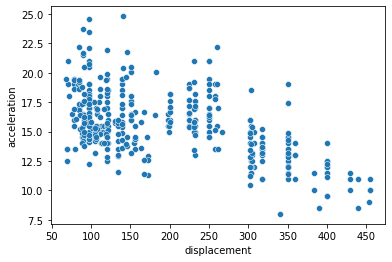

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between displacement and acceleration
Correlation = -0.542701454956354 Pvalue = 8.736973011375994e-32
 Significant: Correlated
-------------------------------------------------------------------------------------------------


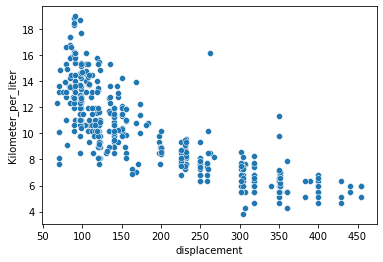

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between displacement and Kilometer_per_liter
Correlation = -0.8065213627802079 Pvalue = 3.4095643532778264e-92
 Significant: Correlated
-------------------------------------------------------------------------------------------------


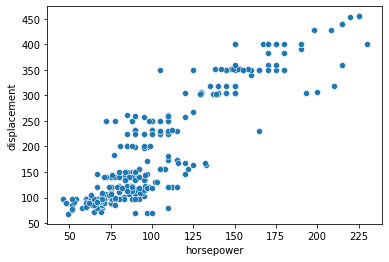

Correlation check between horsepower and displacement
Correlation = 0.8972262768393463 Pvalue = 2.663429670603193e-142
 Significant: Correlated
-------------------------------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


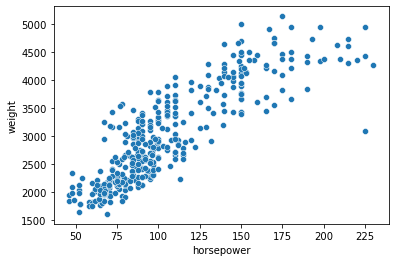

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between horsepower and weight
Correlation = 0.8633303131051324 Pvalue = 2.2096388647773884e-119
 Significant: Correlated
-------------------------------------------------------------------------------------------------


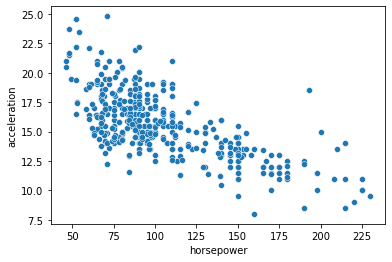

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between horsepower and acceleration
Correlation = -0.687297930834754 Pvalue = 8.38895038073825e-57
 Significant: Correlated
-------------------------------------------------------------------------------------------------


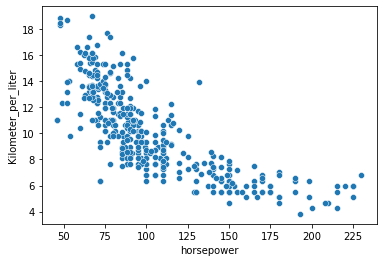

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between horsepower and Kilometer_per_liter
Correlation = -0.7777540936746727 Pvalue = 1.1511729765271678e-81
 Significant: Correlated
-------------------------------------------------------------------------------------------------


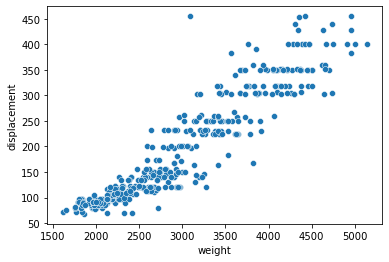

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between weight and displacement
Correlation = 0.9326463432425447 Pvalue = 5.622324620439115e-177
 Significant: Correlated
-------------------------------------------------------------------------------------------------


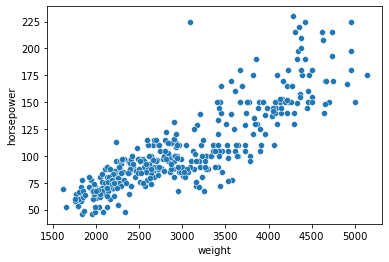

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between weight and horsepower
Correlation = 0.8633303131051324 Pvalue = 2.2096388647773884e-119
 Significant: Correlated
-------------------------------------------------------------------------------------------------


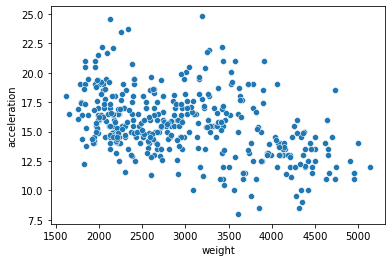

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between weight and acceleration
Correlation = -0.4162060211671119 Pvalue = 4.599696395815448e-18
 Significant: Correlated
-------------------------------------------------------------------------------------------------


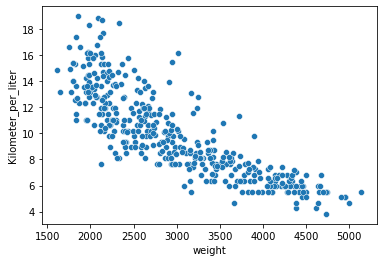

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between weight and Kilometer_per_liter
Correlation = -0.8344820000169542 Pvalue = 2.801007059440628e-104
 Significant: Correlated
-------------------------------------------------------------------------------------------------


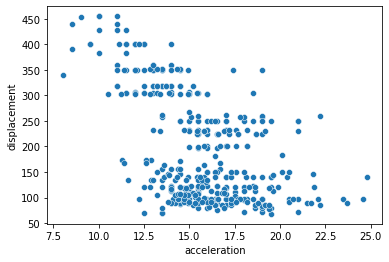

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between acceleration and displacement
Correlation = -0.542701454956354 Pvalue = 8.736973011375994e-32
 Significant: Correlated
-------------------------------------------------------------------------------------------------


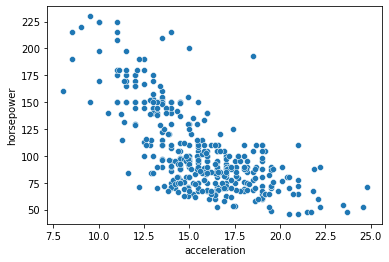

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between acceleration and horsepower
Correlation = -0.687297930834754 Pvalue = 8.38895038073825e-57
 Significant: Correlated
-------------------------------------------------------------------------------------------------


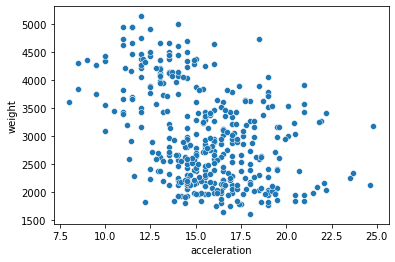

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between acceleration and weight
Correlation = -0.4162060211671119 Pvalue = 4.599696395815448e-18
 Significant: Correlated
-------------------------------------------------------------------------------------------------


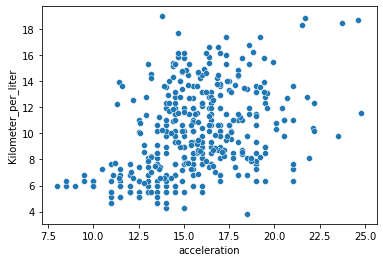

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between acceleration and Kilometer_per_liter
Correlation = 0.41899708770738137 Pvalue = 2.6165225522968724e-18
 Significant: Correlated
-------------------------------------------------------------------------------------------------


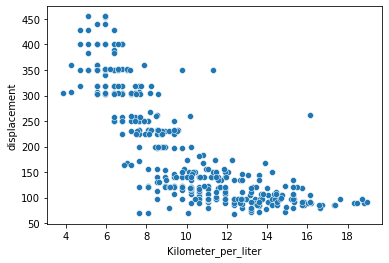

Correlation check between Kilometer_per_liter and displacement
Correlation = -0.8065213627802079 Pvalue = 3.4095643532778264e-92
 Significant: Correlated
-------------------------------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


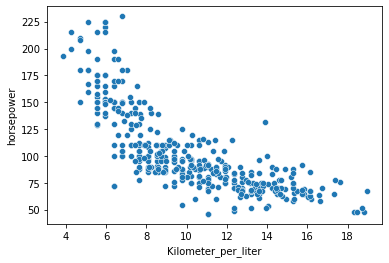

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Correlation check between Kilometer_per_liter and horsepower
Correlation = -0.7777540936746727 Pvalue = 1.1511729765271678e-81
 Significant: Correlated
-------------------------------------------------------------------------------------------------


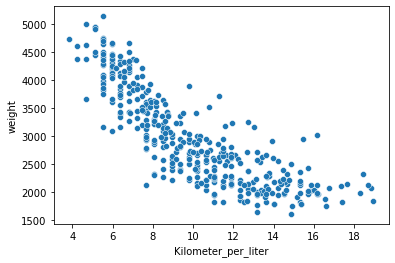

Correlation check between Kilometer_per_liter and weight
Correlation = -0.8344820000169542 Pvalue = 2.801007059440628e-104
 Significant: Correlated
-------------------------------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


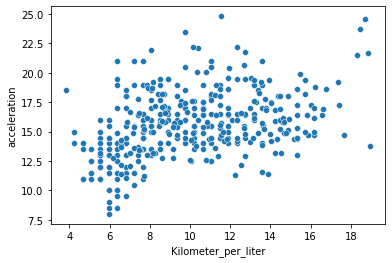

Correlation check between Kilometer_per_liter and acceleration
Correlation = 0.41899708770738137 Pvalue = 2.6165225522968724e-18
 Significant: Correlated
-------------------------------------------------------------------------------------------------


In [21]:
for i in  num:
    for j in  num:
        Correlation=0
        Pvalue=0
        if i !=j:
            sns.scatterplot(num[i],num[j])
            plt.show()
            print('Correlation check between', i ,'and',j)
            Correlation,Pvalue= pearsonr(num[i],num[j])
            print('Correlation =',Correlation,'Pvalue =',Pvalue)
            if Pvalue>0.05:
                print('Not Significant: No Correlation')
            else:
                print(' Significant: Correlated')
            print('-------------------------------------------------------------------------------------------------')

#### The variables are correlated but doesn't have linearity between them.

In [22]:
IDVn.corr()

,displacement,horsepower,weight,acceleration
displacement,1.000000,0.897226,0.932646,-0.542701
horsepower,0.897226,1.000000,0.863330,-0.687298
weight,0.932646,0.863330,1.000000,-0.416206
acceleration,-0.542701,-0.687298,-0.416206,1.000000


<AxesSubplot:>

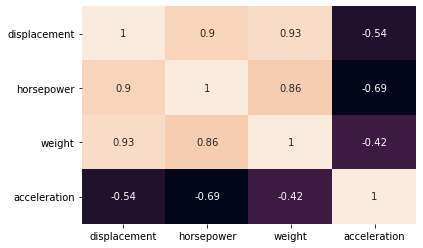

In [23]:
sns.heatmap(IDVn.corr(),cbar=False,annot = True)

#### From the heatmap, we can infer the independent variables are correlated and also have multicollinearity.
To understand the strength of multicollinearity, we do VIF test.

### Multivariate Analysis

In [24]:
num.corr()

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
displacement,1.000000,0.897226,0.932646,-0.542701,-0.806521
horsepower,0.897226,1.000000,0.863330,-0.687298,-0.777754
weight,0.932646,0.863330,1.000000,-0.416206,-0.834482
acceleration,-0.542701,-0.687298,-0.416206,1.000000,0.418997
Kilometer_per_liter,-0.806521,-0.777754,-0.834482,0.418997,1.000000


<AxesSubplot:>

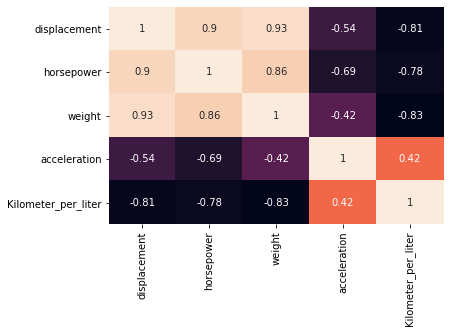

In [25]:
sns.heatmap(num.corr(),annot=True,cbar=False)

### Multicollinearity Check - Between Numeric Independent variables

##### Variance Inflation Factor

In [26]:
IDVn.head()

,displacement,horsepower,weight,acceleration
0,307.0,130,3504,12.0
1,350.0,165,3693,11.5
2,318.0,150,3436,11.0
3,304.0,150,3433,12.0
4,302.0,140,3449,10.5


In [27]:
for i in range(len(IDVn.columns)):
    print(f'{IDVn.columns[i]}-------------> {vif(IDVn.values,i)}')

displacement-------------> 45.64517351712604
horsepower-------------> 41.79082906029465
weight-------------> 134.46691573594248
acceleration-------------> 20.201404822657057


### Linear Model

In [28]:
x=IDVn
y= DV
x,y

(     displacement  horsepower  weight  acceleration
 0           307.0         130    3504          12.0
 1           350.0         165    3693          11.5
 2           318.0         150    3436          11.0
 3           304.0         150    3433          12.0
 4           302.0         140    3449          10.5
 ..            ...         ...     ...           ...
 393         140.0          86    2790          15.6
 394          97.0          52    2130          24.6
 395         135.0          84    2295          11.6
 396         120.0          79    2625          18.6
 397         119.0          82    2720          19.4
 
 [397 rows x 4 columns],
 0       7.652587
 1       6.377156
 2       7.652587
 3       6.802299
 4       7.227443
          ...    
 393    11.478880
 394    18.706323
 395    13.604599
 396    11.904024
 397    13.179455
 Name: Kilometer_per_liter, Length: 397, dtype: float64)

In [29]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=1,test_size=0.3)

In [30]:
lm= LinearRegression()

In [31]:
lm.fit(xtrain,ytrain)


LinearRegression()

In [32]:
lm.coef_

array([-0.0028253 , -0.02200964, -0.00207716, -0.03612053])

In [33]:
lm.intercept_

19.447607537752226

#### Train 

In [34]:
train_pred= lm.predict(xtrain)


In [35]:
train_error = ytrain-train_pred

##### Checking the normality of train error

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

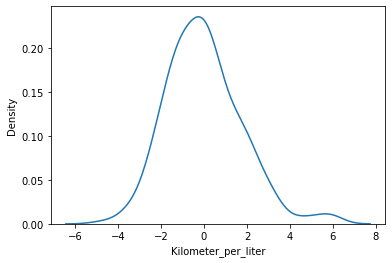

In [36]:
sns.kdeplot(train_error)

##### The errors are not normally distributed.

### Evaluation metrics

In [37]:
mse= mean_squared_error(ytrain , train_pred)
print('MSE = ',mse)
rmse= np.sqrt(mean_squared_error(ytrain , train_pred))
print('RMSE = ',rmse)

MSE =  3.086288131922033
RMSE =  1.7567834618762874


In [38]:
R_squared= r2_score(ytrain , train_pred)
print('R_squared = ',R_squared)

R_squared =  0.7076309336511248


#### Test 

In [39]:
test_pred= lm.predict(xtest)


In [40]:
test_error= ytest- test_pred

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

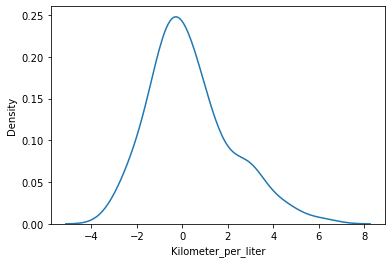

In [41]:
sns.kdeplot(test_error)

##### The errors are not normally distributed.

#### Evaluation metrics

In [42]:
mse= mean_squared_error(ytest , test_pred)
print('MSE = ',mse)
rmse= np.sqrt(mean_squared_error(ytest , test_pred))
print('RMSE = ',rmse)

MSE =  3.2863401140616935
RMSE =  1.8128265537722281


In [43]:
R_squared= r2_score(ytest , test_pred)
print('R_squared = ',R_squared)

R_squared =  0.7104952749994863


In [44]:
# r2 adjusted  penalises the model for choosing wrong predictors value. so we can remove more values .
# r2 and r2 adjusted should be very close or equal to say the accuracy 

#### Adding intercept value- the weight cannot be zero and so we add the intercept value.
#### this will create an entire 1 vector - matrix  
#### this is for  the  calculation of constant value (intercept)

In [45]:
xtrain1= sm.add_constant(xtrain)
xtrain1

,const,displacement,horsepower,weight,acceleration
351,1.0,98.0,65,2045,16.2
59,1.0,97.0,54,2254,23.5
120,1.0,121.0,112,2868,15.5
12,1.0,400.0,150,3761,9.5
350,1.0,105.0,63,2215,14.9
...,...,...,...,...,...
203,1.0,97.0,71,1825,12.2
255,1.0,140.0,88,2720,15.4
72,1.0,304.0,150,3892,12.5
235,1.0,97.0,75,2265,18.2


In [46]:
model=sm.OLS(ytrain,xtrain1).fit()


In [48]:
model.resid #gives the residual values

351    1.717784
59    -2.675980
120   -2.045777
12    -0.483547
350    2.127245
         ...   
203   -0.837645
255   -0.237983
72    -0.374307
235   -1.106936
37    -1.549021
Length: 277, dtype: float64

### Homoscedisticity Check

<AxesSubplot:>

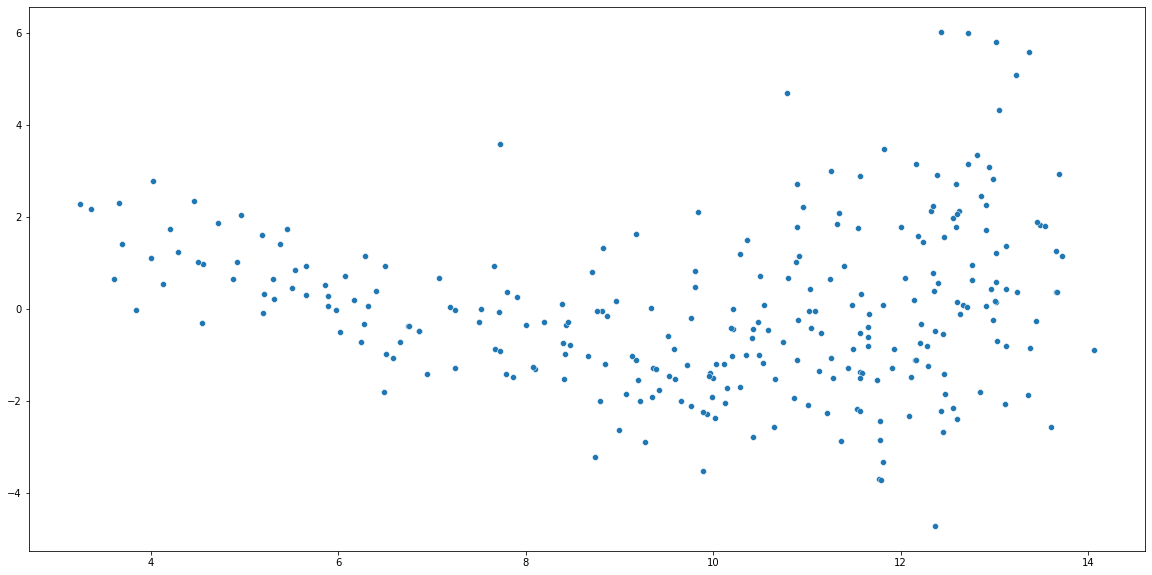

In [49]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=train_pred,y=model.resid)

### This shows the variance of errors are not constant/equal, so there is heteroscedasticity of erros.For this dataset, someother model has to built.

### Building Lasso Regression

In [50]:
lasso= Lasso(alpha=0.01)


In [51]:
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.01)

In [52]:
lasso_pred_train= lasso.predict(xtrain)
lasso_pred_test= lasso.predict(xtest)


In [53]:
lasso_train_error = ytrain-lasso_pred_train
lasso_test_error = ytest-lasso_pred_test

In [54]:
lasso.coef_,lasso.intercept_

(array([-0.00277996, -0.02167253, -0.00209048, -0.03247215]),
 19.386345990161217)

In [70]:
mse= mean_squared_error(ytrain,lasso_pred_train )
print('LASSO TRAIN MSE = ',mse)
rmse= np.sqrt(mean_squared_error(  ytrain,lasso_pred_train ))
print('LASSO TRAIN RMSE = ',rmse)

LASSO TRAIN MSE =  3.0863282952502087
LASSO TRAIN RMSE =  1.756794892766429


In [71]:
mse= mean_squared_error(ytest,lasso_pred_test)
print('LASSO TEST MSE = ',mse)
rmse= np.sqrt(mean_squared_error( ytest,lasso_pred_test))
print('LASSO TEST RMSE = ',rmse)

LASSO TEST MSE =  3.2847737119339144
LASSO TEST RMSE =  1.812394469185424


### Building Ridge Regression

In [142]:
ridge= Ridge()

In [143]:
ridge.fit(xtrain,ytrain)

Ridge()

In [144]:
ridge_train_pred=ridge.predict(xtrain)
ridge_test_pred=ridge.predict(xtest)

In [145]:
ridge.intercept_

19.44683055741779

In [146]:
ridge.coef_

array([-0.00282479, -0.02200548, -0.00207732, -0.0360748 ])

In [147]:
ridge_train_error= ytrain -ridge_train_pred
ridge_test_error=ytest- ridge_test_pred

In [148]:
mse= mean_squared_error(ytrain,ridge_train_pred )
print('RIDGE TRAIN MSE = ',mse)
rmse= np.sqrt(mean_squared_error(  ytrain,ridge_train_pred ))
print('RIDGE TRAIN RMSE = ',rmse)

RIDGE TRAIN MSE =  3.0862881382124736
RIDGE TRAIN RMSE =  1.7567834636666164


In [149]:
mse= mean_squared_error(ytest,ridge_test_pred)
print('RIDGE TEST MSE = ',mse)
rmse= np.sqrt(mean_squared_error( ytest,ridge_test_pred))
print('RIDGE TEST RMSE = ',rmse)

RIDGE TEST MSE =  3.2863206662469326
RIDGE TEST RMSE =  1.8128211898162854


In [150]:
lm.intercept_, ridge.intercept_, lasso.intercept_

(19.447607537752226, 19.44683055741779, 19.386345990161217)

In [151]:
lm.coef_, ridge.coef_, lasso.coef_

(array([-0.0028253 , -0.02200964, -0.00207716, -0.03612053]),
 array([-0.00282479, -0.02200548, -0.00207732, -0.0360748 ]),
 array([-0.00277996, -0.02167253, -0.00209048, -0.03247215]))

check for the errors between linear and lasso & linear and ridge , which ever has the least errors , that is the model to be opted.

In [156]:
R_squared= r2_score(ytest , test_pred)
print('R_squared LINEAR = ',R_squared)

R_squared= r2_score(ytest , ridge_test_pred)
print('R_squared RIDGE = ',R_squared)

R_squared= r2_score(ytest , lasso_pred_test)
print('R_squared LASSO = ',R_squared)

R_squared LINEAR =  0.7104952749994863
R_squared RIDGE =  0.7104969882227281
R_squared LASSO =  0.7106332646175731


In [155]:
COMPARE= pd.DataFrame({'LINEAR':train_error,'LASSO':lasso_train_error,'RIDGE':ridge_train_error})
COMPARE

,LINEAR,LASSO,RIDGE
351,1.717784,1.720832,1.717822
59,-2.675980,-2.693027,-2.676196
120,-2.045777,-2.046098,-2.045784
12,-0.483547,-0.475541,-0.483438
350,2.127245,2.137657,2.127375
...,...,...,...
203,-0.837645,-0.824912,-0.837482
255,-0.237983,-0.232681,-0.237918
72,-0.374307,-0.371148,-0.374266
235,-1.106936,-1.111580,-1.106996


The errors in lasso regression are the least in comparison to linear and ridge model, so we go ahead with lasso regression model.

### Cross Validation

In [80]:
#here we are checking for stability of lasso model
crossval = cross_val_score(lasso,xtrain,ytrain,cv=5)
crossval#cv=5 - 5folds cross validation

array([0.74642267, 0.61652591, 0.6763939 , 0.71020727, 0.74528944])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

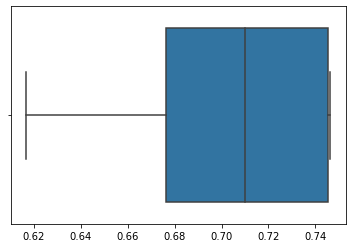

In [81]:
sns.boxplot(crossval)

In [82]:
crossval1 = cross_val_score(lm,xtrain,ytrain,cv=5)
crossval1

array([0.74611655, 0.61655777, 0.67607225, 0.70978504, 0.74552823])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

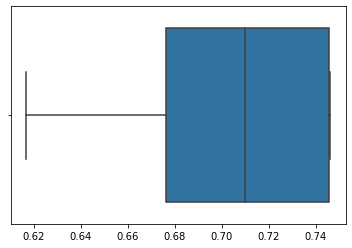

In [83]:
sns.boxplot(crossval1)

In [84]:
crossval2 = cross_val_score(ridge,xtrain,ytrain,cv=5)
crossval2

array([0.746117  , 0.61655764, 0.67608128, 0.70979886, 0.74552602])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

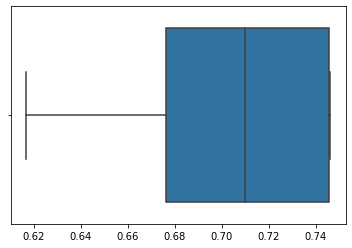

In [85]:
sns.boxplot(crossval2)


There are no outliers in all the 5 folds of the models.(lasso,ridge,lm)#as all the 3 models show the same
the model has high variance, so we can do more regularization technique to reduce the variance of the model